In [0]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)

BASE_FOLDER = '/content/drive/My Drive/Master IA/Autores/07MAIR/Intro Deep learning/Recursos del profesor/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 07MAIR - Redes Neuronales y Deep Learning
## Clase 03: Deep Learning y Deep vision


### Profesores: Adrián Colomer Granero / Gabriel Muñoz Ríos
### Autor: Carlos Fernández Musoles

# Sumario
- Intro deep learning
- Redes convolucionales
- Trabajar con pocos datos
- Visualizacion de CNN

## Tensores
- Dato multidimensional (escalar, vector, matriz, tensor)


- Deep learning consiste en una serie de transformaciones (operaciones matemáticas con tensores) del input para dar output. 


 - operacion mas importante: tensor dot (matmul)

## Construir redes
- Capas compatibles en las dimensiones output - input

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,                  # output 1D tensor con dimensiones (64)
                       input_shape=(256,))) # input 2D tensor con dimensiones 256,ANY
                                            # la sintaxis (256,) indica tuple con solo un numero
model.add(layers.Dense(32))                 # (input asumido de la capa anterior) output 1D tensor con dimension (32)

Using TensorFlow backend.


## Tipos de capas
- cada tipo de capa suele tener un uso
 - Dense para tratar input vector (2D tensor de samples,features)
 - LSTM para tratar secuencias (3D tensores de samples,timestep,features)
 - Convolucionales para tratar imagenes (4D tensores de samples,height,weight,channels)


In [0]:
# mostrar estructura del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 18,528
Trainable params: 18,528
Non-trainable params: 0
_________________________________________________________________


## Estructura de la red neuronal
- La mas habitual es feedforward, pero hay mas
- Two-branch, multihead, inception
- La arquitectura ideal es un arte!

## Deep learning en vision computerizada
- Redes convolucionales (CNN)
 - descripción
 - entrenamiento
- Trabajar con pocos datos
 - data augmentation
 - redes pre-entrenadas
- visualizando lo que aprenden las CNNs

In [0]:
from keras.datasets import mnist

(training_set,training_labels), (testing_set, testing_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# transformacion de los datos
train_data = training_set.reshape((60000,28,28,1))
train_data = train_data.astype('float32')/255
test_data = testing_set.reshape((10000,28,28,1))
test_data = test_data.astype('float32')/255

from keras.utils import to_categorical
train_labels = to_categorical(training_labels)
test_labels = to_categorical(testing_labels)

In [0]:
#oconstruccion de una red CNN
from keras import models
from keras import layers

convnet = models.Sequential()
convnet.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64,activation='relu'))
convnet.add(layers.Dense(10,activation='softmax'))

In [0]:
convnet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
convnet.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
history = convnet.fit(train_data,train_labels,epochs=5,batch_size=128,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 122us/step - loss: 0.2783 - acc: 0.9131 - val_loss: 0.0674 - val_acc: 0.9812
Epoch 2/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.0621 - acc: 0.9803 - val_loss: 0.0602 - val_acc: 0.9830
Epoch 3/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0502 - val_acc: 0.9860
Epoch 4/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0399 - val_acc: 0.9879
Epoch 5/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0387 - val_acc: 0.9892


In [0]:
loss,accuracy = convnet.evaluate(test_data,test_labels)
print('loss {} accuracy {}'.format(loss,accuracy))

10000/10000 [==============================] - 1s 52us/step
loss 0.030650096729423967 accuracy 0.9908


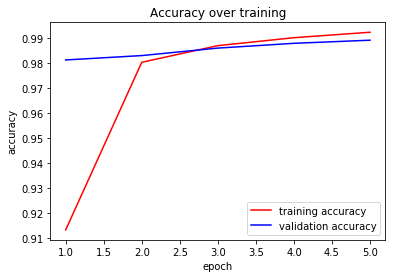

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(history.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

## Convolución

- Dense layers aprenden patrones globales (en toda la imagen) 
- Convoluciones detectan patrones locales (resistente a traslaciones)

- Convoluciones permiten aprender jerarquías de patrones (patrones locales como lineas, curvas, etc. a circulos, rectangulos, a constelaciones)


### Cómo lo hacen

- Divide el input (3D tensor) en parches y aplica una transformación (la misma en cada capa) a cada parche

- Output (3D tensor) es un mapa de features (cada una el resultado de aplicar la transformacion). Height x width x filtros. Cada capa es el resultado de aplicar un filtro a cada parche del input

- La convolucion desliza cada parche sobre el input, parando en cada posible posicion y aplicando la transformacion (función kernel)

### Padding y striding
- Sólo hay 9 formas de aplicar un parche 3x3 a un imagen de 5x5
- Si se quiere aplicar a todos los pixeles --> padding (añadir filas y columnas para hacerlo posible)
```python
Conv2D(...,padding=<valor>): 'valid' sin padding, 'same' para igualar tamanyo input y output feature 
```

- stride determina el salto entre ventana y ventana
- poco habitual (efecto downsample)
```python
Conv2D(...,stride=<valor>): int, salto entre ventanas 
```

### Pooling
- Se usan para hacer downsampling thel input feature (reducir dimensionalidad)
- Similar a convoluciones, pero no aplican un kernel sino que aplican funcion 'max' (o average)
- Por defecto, tamaño 2x2 y stride 2


#### ¿Para qué?
- Reducir el numero de parámetros 
- permite a ventanas posteriores aceptar input de areas más grandes en capas anteriores (mejora percepción)

In [0]:
# red sin pooling

from keras import models
from keras import layers

convnet_nopooling = models.Sequential()
convnet_nopooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Flatten())
convnet_nopooling.add(layers.Dense(512,activation='relu'))
convnet_nopooling.add(layers.Dense(10,activation='softmax'))

convnet_nopooling.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               18874880  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total para

In [0]:
# Red con pooling
convnet_pooling = models.Sequential()
convnet_pooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))
convnet_pooling.add(layers.Flatten())
convnet_pooling.add(layers.Dense(512,activation='relu'))
convnet_pooling.add(layers.Dense(10,activation='softmax'))

convnet_pooling.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

### Parámetros de CNN
- Tamañoo de los parches (habitualmente 3x3 o 5x5)
- Depth (profundidad, número de filtros) del mapa de features del output (32 y 64 en el ejemplo)
```python
Conv2D(output_depth,(patch_height,patch_width))
```

## Entrenando CNNs
- Entrenar con pocos valores
- Data augmentation para ayudar overfitting
- CIFAR-10 imagenes http://www.cs.toronto.edu/~kriz/cifar.html


In [0]:
from keras.datasets import cifar10
import numpy as np

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
train_data.shape

(50000, 32, 32, 3)

In [0]:
train_labels.shape

(50000, 1)

In [0]:
# seleccionar subset del total
samples_per_class = 300
number_of_classes = 10
train_data_subset = np.array([])
train_labels_subset = np.array([])
for i in range(number_of_classes):
    mask = np.where(train_labels == i)[0] # needed because train_labels has 2 dimensions
    if i == 0:
        train_data_subset = train_data[mask[:samples_per_class]]
        train_labels_subset = train_labels[mask[:samples_per_class]]
    else:
        train_data_subset = np.concatenate((train_data_subset,train_data[mask[:samples_per_class]]))
        train_labels_subset = np.concatenate((train_labels_subset,train_labels[mask[:samples_per_class]]))

In [0]:
train_data_subset.shape

(3000, 32, 32, 3)

In [0]:
train_labels_subset.shape

(3000, 1)

In [0]:
from keras.utils import to_categorical

# transformar los datos
x_train = train_data_subset.astype('float32')/255
x_test = test_data.astype('float32')/255

y_train = to_categorical(train_labels_subset)
y_test = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

convnet = models.Sequential()
convnet.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(512,activation='relu'))
convnet.add(layers.Dense(number_of_classes,activation='softmax'))

In [0]:
convnet.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
history = convnet.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Train on 3000 samples, validate on 10000 samples
Epoch 1/20
3000/3000 [==============================] - 1s 470us/step - loss: 2.1991 - acc: 0.1767 - val_loss: 1.9532 - val_acc: 0.3022
Epoch 2/20
3000/3000 [==============================] - 1s 267us/step - loss: 1.9277 - acc: 0.2987 - val_loss: 1.8446 - val_acc: 0.3255
Epoch 3/20
3000/3000 [==============================] - 1s 264us/step - loss: 1.7716 - acc: 0.3637 - val_loss: 1.8818 - val_acc: 0.3200
Epoch 4/20
3000/3000 [==============================] - 1s 262us/step - loss: 1.6586 - acc: 0.3937 - val_loss: 1.6963 - val_acc: 0.3886
Epoch 5/20
3000/3000 [==============================] - 1s 263us/step - loss: 1.5676 - acc: 0.4427 - val_loss: 1.7034 - val_acc: 0.3863
Epoch 6/20
3000/3000 [==============================] - 1s 260us/step - loss: 1.4497 - acc: 0.4793 - val_loss: 1.5494 - val_acc: 0.4366
Epoch 7/20
3000/3000 [==============================] - 1s 262us/step - loss: 1.3610 - acc: 0.5077 - val_loss: 1.4972 - val_acc: 0.4626

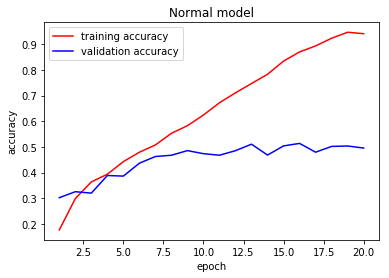

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(history.history['acc'])+1)
plt.title('Normal model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

# Data augmentation
- Incrementar el número de ejemplos para evitar overfitting (junto con dropout)
- Generar datos a partir de los presentes, a través de transformaciones

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

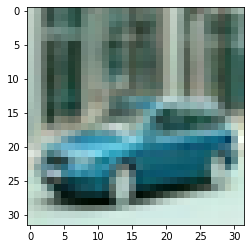

Label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


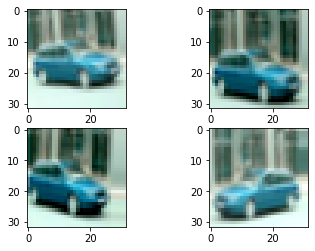

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 555
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()
print('Label {}'.format(y_train[sample]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_train[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [0]:
from keras import models
from keras import layers

convnet_augmentation = models.Sequential()
convnet_augmentation.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_augmentation.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_augmentation.add(layers.MaxPooling2D((2,2)))
convnet_augmentation.add(layers.Dropout(0.25))
convnet_augmentation.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_augmentation.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_augmentation.add(layers.MaxPooling2D((2,2)))
convnet_augmentation.add(layers.Flatten())
convnet_augmentation.add(layers.Dropout(0.25))
convnet_augmentation.add(layers.Dense(512,activation='relu'))
convnet_augmentation.add(layers.Dropout(0.5))
convnet_augmentation.add(layers.Dense(number_of_classes,activation='softmax'))

In [0]:
convnet_augmentation.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
### entrenar utilizando el generador de data
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
#datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10 # multiplicar por 10 el numero de ejemplos

# Fit the model on the batches generated by datagen.flow().
history_augmentation = convnet_augmentation.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=20,
                            validation_data=(x_test, y_test),
                            #workers=4,
                            steps_per_epoch=num_samples//batch_size)

Epoch 1/20
937/937 [==============================] - 23s 25ms/step - loss: 1.4588 - acc: 0.4750 - val_loss: 1.4526 - val_acc: 0.4943
Epoch 2/20
937/937 [==============================] - 24s 26ms/step - loss: 1.2338 - acc: 0.5626 - val_loss: 1.2223 - val_acc: 0.5810
Epoch 3/20
937/937 [==============================] - 23s 24ms/step - loss: 1.1176 - acc: 0.6038 - val_loss: 1.1770 - val_acc: 0.6109
Epoch 4/20
937/937 [==============================] - 23s 24ms/step - loss: 1.0437 - acc: 0.6384 - val_loss: 1.5031 - val_acc: 0.5490
Epoch 5/20
937/937 [==============================] - 25s 27ms/step - loss: 0.9945 - acc: 0.6586 - val_loss: 1.4876 - val_acc: 0.5859
Epoch 6/20
937/937 [==============================] - 22s 24ms/step - loss: 0.9712 - acc: 0.6652 - val_loss: 1.5833 - val_acc: 0.5733
Epoch 7/20
937/937 [==============================] - 22s 24ms/step - loss: 0.9568 - acc: 0.6733 - val_loss: 1.1927 - val_acc: 0.6375
Epoch 8/20
937/937 [==============================] - 23s 25ms

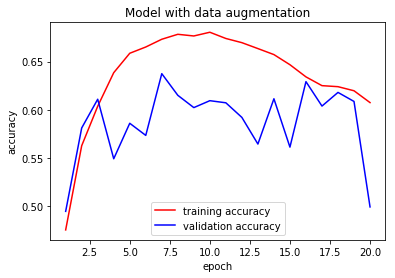

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#plot accuracy
epochs = np.arange(1,len(history_augmentation.history['acc'])+1)
plt.title('Model with data augmentation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_augmentation.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_augmentation.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

# guardar el modelo
convnet_augmentation.save(BASE_FOLDER+'resources/convnet_augmentation.h5')

# Utilizando una red pre-entrenada

- Aunque no hayan sido entrenadas con las mismas clases target, han aprendido a distinguir features
- Puede reutilizarse en otra red
- Bueno cuando se tienen pocos datos

## Extraccion de features
- Red entrenada en ImageNet: animales, objetos, etc. 1.4 millones
- Utilizar la parte convolucional de una red entrenada en gran dataset
 - genérica


- la parte densa suele ser más especifica a las clases objetivo
- Fijar esa parte y entrenar solo la parte densa

In [0]:
#keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# kernels pequenyos de 3x3
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False, # incluir la parte densa (fully connected)
                 input_shape=(32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
# conectarlo a nueva parte densa
from keras import models
from keras import layers

conv_base.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
''' TRANSFER LERANING vs FINE-TUNING

#¿Y si quisieramos re-entrenar algún bloque del base model? -> Fine-tuning
# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers:
  if layer.name == 'block5_conv1': 
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...')
  
# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(1000, activation='relu', name='fc1')(x) 
x = Dropout(0.3)(x) 
x = Dense(200, activation='relu', name='fc2')(x) 
x = Dense(10, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x)  

'''

In [0]:
# compilar el modelo
pre_trained_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

In [0]:
# entrenar utilizando el generador de data
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_pretrained = pre_trained_model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=20,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)

Epoch 1/20
352/937 [==========>...................] - ETA: 14s - loss: 1.1214 - acc: 0.6091

KeyboardInterrupt: ignored

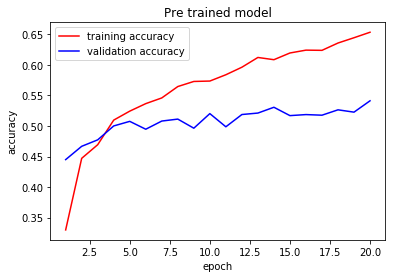

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#plot accuracy
epochs = np.arange(1,len(history_pretrained.history['acc'])+1)
plt.title('Pre trained model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_pretrained.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_pretrained.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

### Ejercicio: Alternativa liviana
- Entrenar esto en CPU es demasiado lento
- Ya que la parte CNN no es entrenable, se puede pasar una vez por imagen y grabar el output en una ndarray
 - utilizar como input de la parte entrenable estas ndarrays

# Visualizar CNN
- Como las features que aprenden las CNN son representaciones visuales, se pueden visualizar
- Tres formas
 - Visualizar activaciones intermedias
 - Visualizar filtros convolucionales
 - Visualizar heatmaps de las activaciones por clase

## Visualizar Activaciones intermedias
- Visualizar el output de las capas de la red
- 2D imagen por canal

In [0]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
__________________________________

In [0]:
# extraer outputs
from keras import models

output_layers = [layer.output for layer in model_augmentation.layers[:7]]
activation_model = models.Model(inputs=model_augmentation.input, outputs=output_layers)

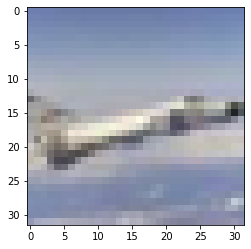

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# imagen 
sample = 55
input_img = x_train[sample].reshape((1,32,32,3))
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()

In [0]:
# activacion, 32 canales, feature map de 30x30
layer = 0
activations = activation_model.predict(input_img)
layer_activation = activations[layer]
print(layer_activation.shape)

(1, 30, 30, 32)


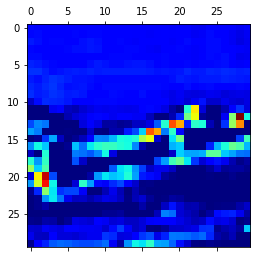

In [0]:
# mostrar cualquier canal
channel = 7
plt.matshow(layer_activation[0,:,:,channel], cmap='jet')

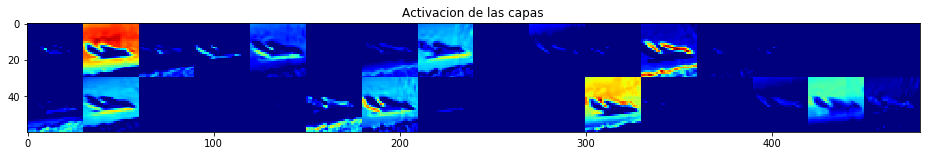

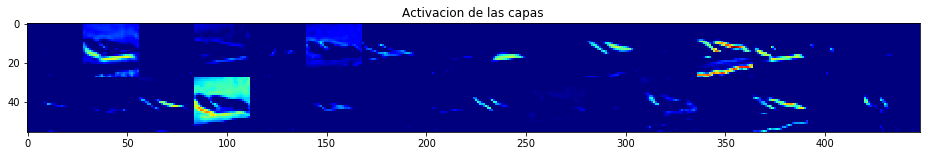

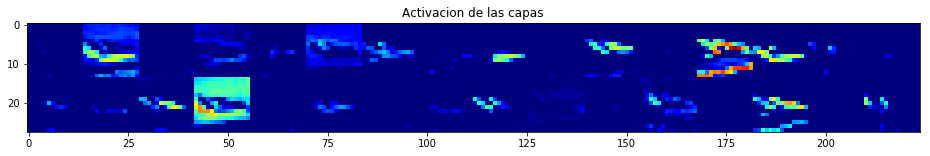

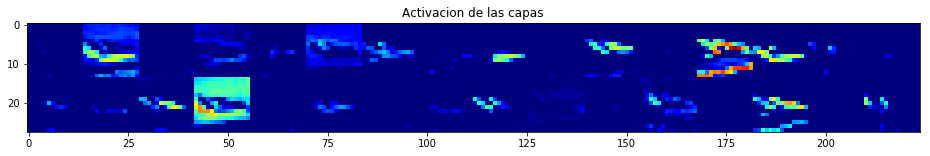

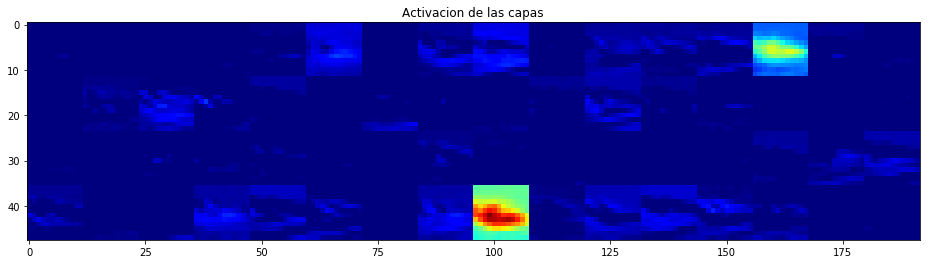

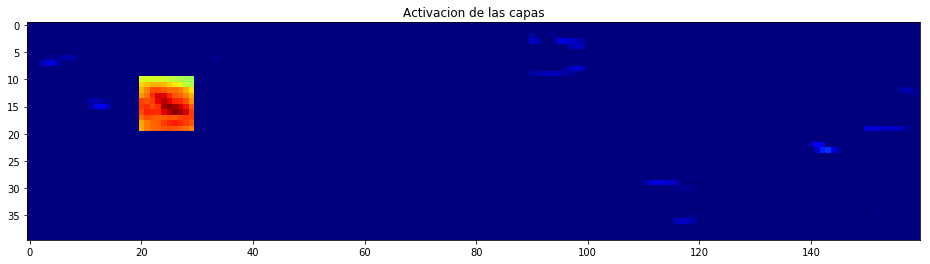

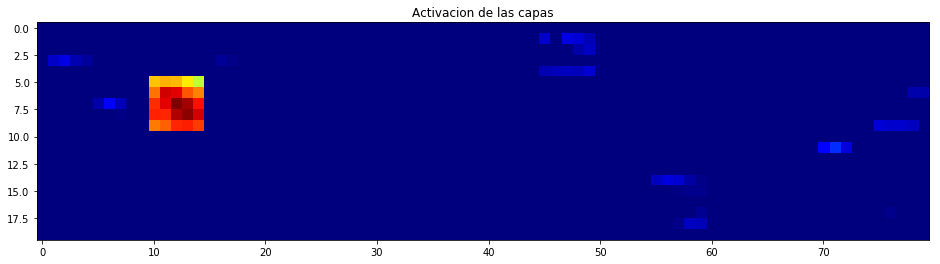

In [0]:
import numpy as np
# visualizar todas las capas
layer_names = [layer.name for layer in model_augmentation.layers[:7]]
images_per_row = 16
display_grid = []
for layer_name, layer_activation in zip(layer_names,activations):
    # numero de features
    n_features = layer_activation.shape[-1]
    # tamanyo de cada feature
    size = layer_activation.shape[1]
    # numero de columnas a mostrar
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_img = layer_activation[0,:,:,col * images_per_row + row]
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_img
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title('Activacion de las capas')
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='jet')


### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son maas dif´´iciles de interpretar (abstractas) y tienen info relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

## Visualizando filtros convolucionales
- Visualizar las imagenes que maximizan la respuesta a un filtro

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)

In [0]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    
    # para obtener el patron que responde de forma maxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # seleccionar el primero, ya que esto devuelve una lista
    # normalizacion para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # ultima constante para evitar dividir por 0
    # definir funcion que calcula la perdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])
    
    # iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # magnitud de cada actualizacion en el gradiente
    n_steps = 40 # numero de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')
    
    return img

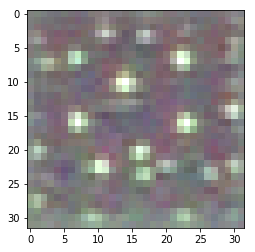

In [0]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block3_conv1'
filter_index = 0 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

### Ejercicio
Mostrar los patrones de maxima activacion para todos los filtros de una capa

## Visualización de heatmaps de activacion por clase
- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [0]:
# tecnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

Using TensorFlow backend.


553467904/553467096 [==============================] - 12s 0us/step








In [0]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# cargar imagen de perro
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [0]:
# testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

40960/35363 [==================================] - 0s 5us/step
[[('n02123045', 'tabby', 0.35036626), ('n02124075', 'Egyptian_cat', 0.32183626), ('n02123159', 'tiger_cat', 0.28601378), ('n02127052', 'lynx', 0.0132602705), ('n04040759', 'radiator', 0.00089392427)]]


In [0]:
tabbycat_output_index = np.argmax(prediction[0])
tabbycat_output = model.output[:,tabbycat_output_index]
last_conv_layer = model.get_layer('block5_conv3')

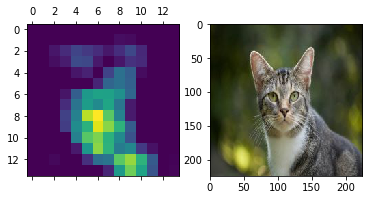

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabbycat_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

### Ejercicio
Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.)